In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd "/content/drive/MyDrive/Colab_Notebooks"

/content/drive/.shortcut-targets-by-id/1oluhICfAB88fijE63Eml9oYqHw12iAhk/Colab Notebooks


In [4]:
pwd

'/content/drive/.shortcut-targets-by-id/1oluhICfAB88fijE63Eml9oYqHw12iAhk/Colab Notebooks'

In [5]:
!pip install tensorflow-addons

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,Sequential
from keras.layers import Input, Dense, Reshape, Flatten, Conv2DTranspose, concatenate, Activation, LeakyReLU,BatchNormalization,Conv2D,add
from keras.models import Model
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam,SGD,Adagrad
from keras.models import Model, load_model
from keras.layers import Input,Dropout,add,BatchNormalization
import numpy as np
from tensorflow.keras.initializers import GlorotNormal,HeNormal,RandomNormal
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, UpSampling2D, LeakyReLU, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import RandomNormal,Orthogonal
from tensorflow.keras.regularizers import l2
from tensorflow_addons.layers import SpectralNormalization,InstanceNormalization
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
tf.keras.backend.clear_session()
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = InteractiveSession(config=ConfigProto(gpu_options=gpu_options))
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
train_sat = open('data/train_sat', 'rb')
train_normal = open('data/train_normal', 'rb')
sat_map = pickle.load(train_sat)
normal_map=pickle.load(train_normal)
train_sat.close()
train_normal.close()

In [8]:
# def normalization_img(image):
#   std_img = np.min(image) / (np.max(image) - np.min(image))
#   norm_image = (image - std_img)
#   return norm_image

In [9]:
# from skimage.transform import resize
# sat_map = resize(sat_map, (512, 512))
resized_sat_map=[]
resized_normal_map=[]
for sat_img in sat_map:
  sat_temp=cv2.resize(sat_img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
  sat_normalized=cv2.normalize(sat_temp, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  resized_sat_map.append(sat_normalized)

for normal_img in normal_map:
  normal_temp=cv2.resize(normal_img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
  normal_normalized=cv2.normalize(normal_temp, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  resized_normal_map.append(normal_normalized)
resized_sat_map=np.array(resized_sat_map)
resized_normal_map=np.array(resized_normal_map)

In [10]:
resized_sat_map.shape

(1096, 256, 256, 3)

In [11]:
# n_image=resized_sat_map[0]
# # std_img = np.min(n_image) / (np.max(n_image) - np.min(n_image))
# norm_image = cv2.normalize(n_image, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# # norm_image = (n_image - np.min(n_image)) / (np.max(n_image) - np.min(n_image))

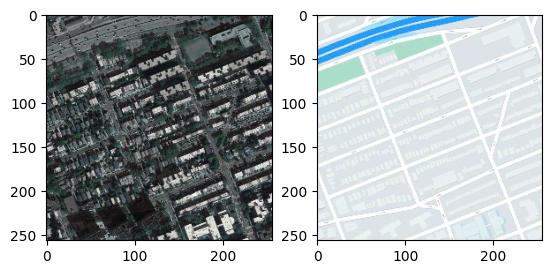

In [12]:
plt.subplot(121)
plt.imshow(resized_sat_map[2])
plt.subplot(122)
plt.imshow(resized_normal_map[2])

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 128, 128, 32  1536        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu_5 (LeakyReLU)      (None, 128, 128, 32  0           ['conv2d_5[0][0]']               
                                )                                                           

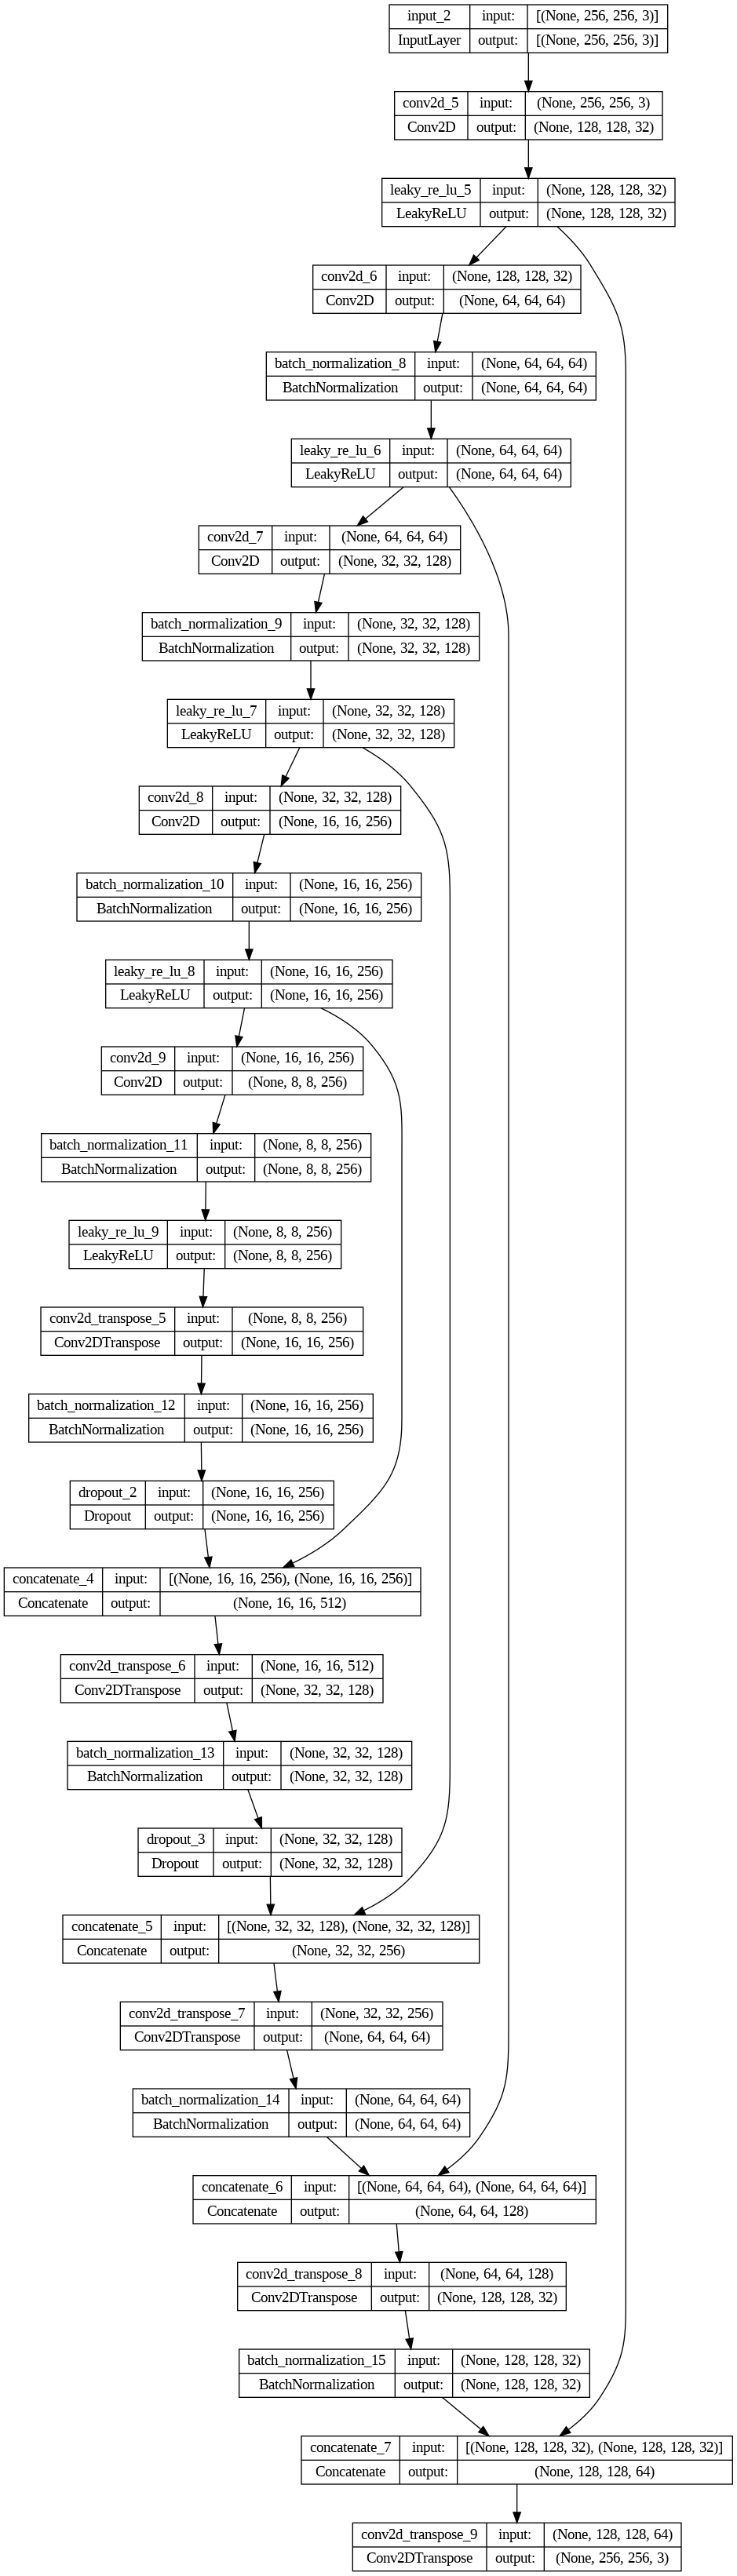

In [13]:
from tensorflow.python.ops.gen_nn_ops import Relu
def make_generator_model():
  input_image=Input(shape=(256,256,3))
  initializer=tf.random_normal_initializer(0., 0.02)

  conv1=Conv2D(32, 4,strides=2,padding='same', kernel_initializer=initializer,use_bias=False)(input_image)
  # conv1=BatchNormalization()(conv1)
  conv1=LeakyReLU()(conv1)

  conv2=Conv2D(64, 4,strides=2,padding='same', kernel_initializer=initializer,use_bias=False)(conv1)
  conv2=BatchNormalization()(conv2)
  conv2=LeakyReLU()(conv2)


  conv3=Conv2D(128, 4,strides=2,padding='same', kernel_initializer=initializer,use_bias=False)(conv2)
  conv3=BatchNormalization()(conv3)
  conv3=LeakyReLU()(conv3)


  conv4=Conv2D(256, 4,strides=2,padding='same', kernel_initializer=initializer,use_bias=False)(conv3)
  conv4=BatchNormalization()(conv4)
  conv4=LeakyReLU()(conv4)

  bottleneck=Conv2D(256, 4,strides=2,padding='same', kernel_initializer=initializer,use_bias=False)(conv4)
  bottleneck=BatchNormalization()(bottleneck)
  bottleneck=LeakyReLU()(bottleneck)

  deconv4=Conv2DTranspose(256,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False,activation='relu')(bottleneck)
  deconv4=BatchNormalization()(deconv4)
  deconv4=Dropout(0.4)(deconv4)
  merge4=Concatenate()([deconv4,conv4])

  deconv3=Conv2DTranspose(128,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False,activation='relu')(merge4)
  deconv3=BatchNormalization()(deconv3)
  deconv3=Dropout(0.4)(deconv3)
  merge3=Concatenate()([deconv3,conv3])


  deconv2=Conv2DTranspose(64,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False,activation='relu')(merge3)
  deconv2=BatchNormalization()(deconv2)
  # deconv2=Dropout(0.4)(deconv2)
  merge2=Concatenate()([deconv2,conv2])


  deconv1=Conv2DTranspose(32,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False,activation='relu')(merge2)
  deconv1=BatchNormalization()(deconv1)
  # deconv1=Dropout(0.4)(deconv1)
  merge1=Concatenate()([deconv1,conv1])

  output_layer=Conv2DTranspose(3,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False,activation='tanh')(merge1)

  model=Model(input_image,output_layer)
  return model


# generator=make_generator_model()
# generator.summary()
# tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)
generator=tf.keras.models.load_model('generator_model_image_translation.h5')
generator.summary()
tf.keras.utils.plot_model(generator,show_shapes=True)





(10, 256, 256, 3)


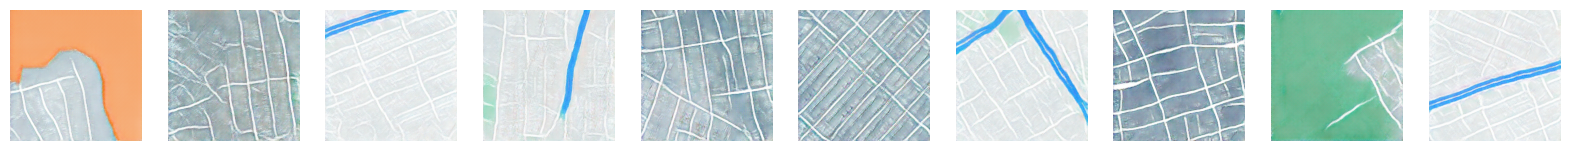

In [14]:
latent_dim=100
num_img=10
# random_latent_vectors = tf.random.normal(shape=(100, latent_dim))
img=generator(resized_sat_map[0:10],training=False)
print(img.shape)
fig=plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1,10,i+1)
    image1 = tf.keras.preprocessing.image.array_to_img(np.array(img[i]))
    plt.imshow(image1)
    plt.axis('off')
plt.show()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_9 (Concatenate)    (None, 256, 256, 6)  0           ['input_5[0][0]',                
                                                                  'input_6[0][0]']          

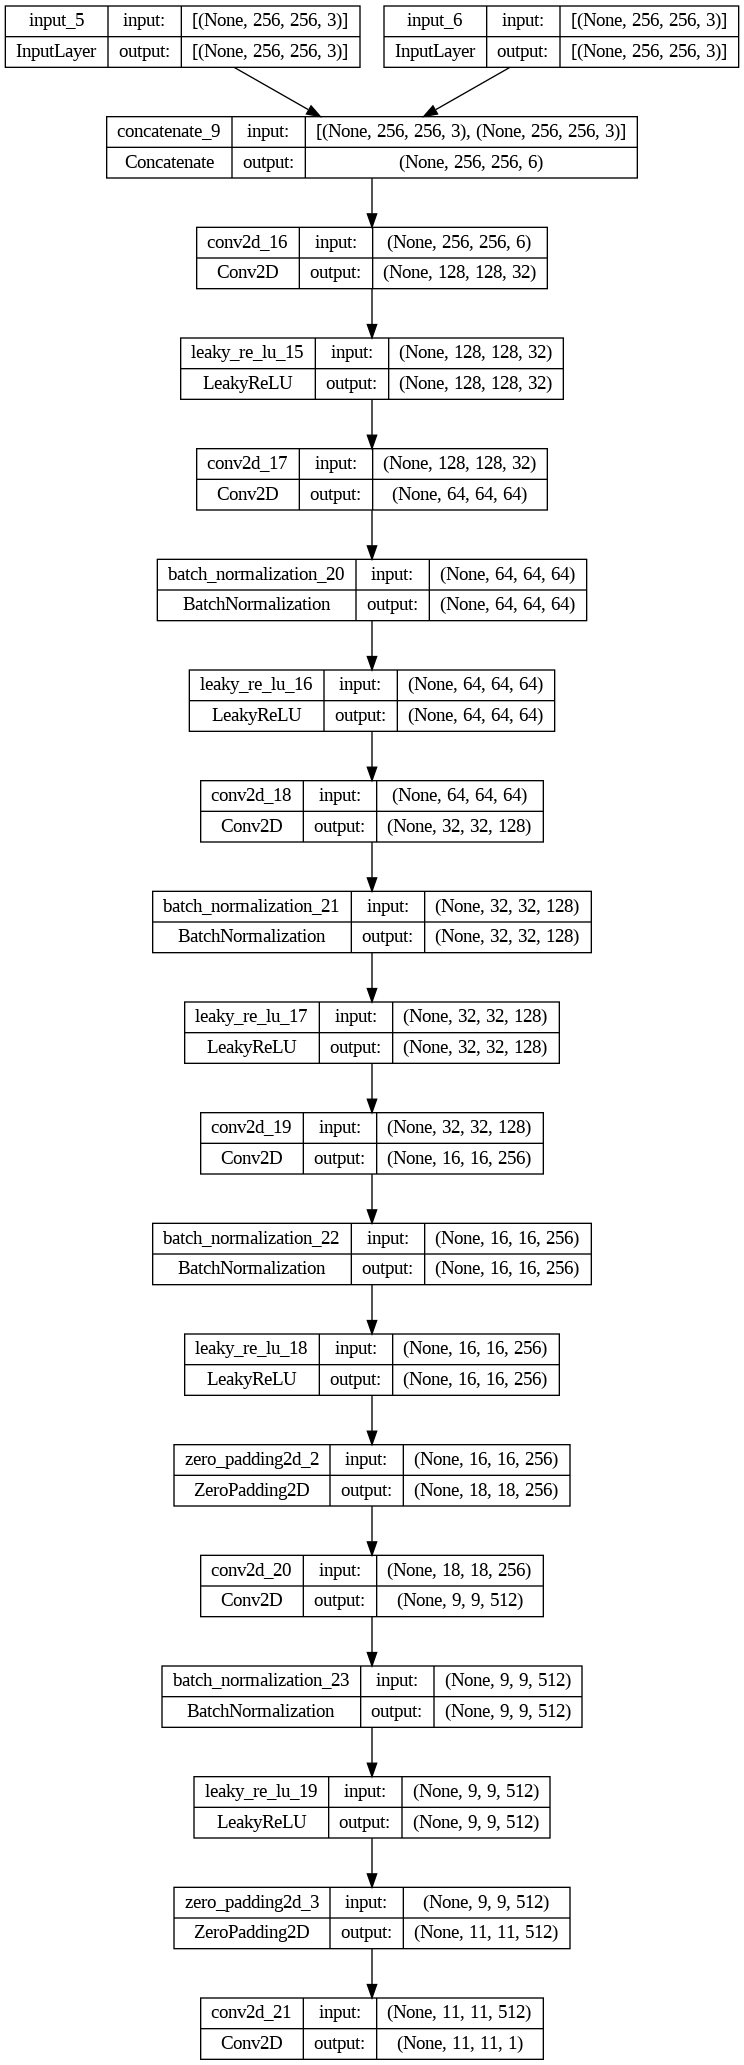

In [15]:
def make_descriminator_model():
  input_image=Input(shape=(256,256,3))
  target_input=Input(shape=(256,256,3))
  initializer=tf.random_normal_initializer(0., 0.02)

  concat_image=Concatenate()([input_image,target_input])

  conv1=Conv2D(32, 4,strides=2,padding='same', kernel_initializer=initializer,use_bias=False)(concat_image)
  conv1=LeakyReLU()(conv1)

  conv2=Conv2D(64, 4,strides=2,padding='same', kernel_initializer=initializer,use_bias=False)(conv1)
  conv2=BatchNormalization()(conv2)
  conv2=LeakyReLU()(conv2)

  conv3=Conv2D(128, 4,strides=2,padding='same', kernel_initializer=initializer,use_bias=False)(conv2)
  conv3=BatchNormalization()(conv3)
  conv3=LeakyReLU()(conv3)

  conv4=Conv2D(256, 4,strides=2,padding='same', kernel_initializer=initializer,use_bias=False)(conv3)
  conv4=BatchNormalization()(conv4)
  conv4=LeakyReLU()(conv4)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(conv4)
  conv5=Conv2D(512, 4,strides=2,padding='same', kernel_initializer=initializer,use_bias=False)(zero_pad1)
  conv5=BatchNormalization()(conv5)
  conv5=LeakyReLU()(conv5)

  zero_pad2=tf.keras.layers.ZeroPadding2D()(conv5)


  output_image=Conv2D(1, 4,strides=1,padding='same', kernel_initializer=initializer,use_bias=False)(zero_pad2)


  model=Model([input_image,target_input],output_image)
  return model


# descriminator=make_descriminator_model()
# descriminator.summary()
# tf.keras.utils.plot_model(descriminator, show_shapes=True, dpi=64)

descriminator=tf.keras.models.load_model('descriminator_model_image_translation.h5')
descriminator.summary()
tf.keras.utils.plot_model(descriminator,show_shapes=True)


(10, 11, 11, 1)


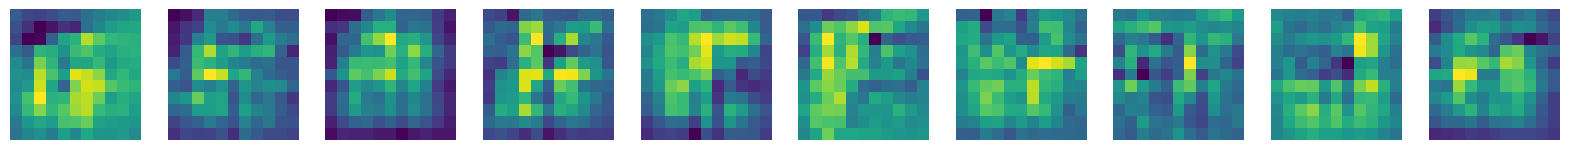

In [16]:
ypred=descriminator([img,resized_normal_map[0:10]],training=False)
print(ypred.shape)
fig=plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(10,10,i + 1)
    image1 = tf.keras.preprocessing.image.array_to_img(np.array(ypred[i]))
    plt.imshow(image1)
    plt.axis('off')
plt.show()

In [17]:
from keras.losses import BinaryCrossentropy
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
descriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

generator_loss=BinaryCrossentropy(from_logits=True)
descriminator_loss=BinaryCrossentropy(from_logits=True)

In [18]:
class GAN(Model):
  def __init__(self,generator,descriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)
    self.generator=generator
    self.descriminator=descriminator

  def compile(self,generator_optimizer,descriminator_optimizer,*args,**kwargs):
    super().compile(*args,**kwargs)
    self.generator_optimizer=generator_optimizer
    self.descriminator_optimizer=descriminator_optimizer
    pass
  def train_step(self,data):
    images=data[0]
    target=data[1]
    LAMBDA = 10
    # noise=tf.random.normal((BATCH_SIZE,100))

    with tf.GradientTape() as g_tape,tf.GradientTape() as d_tape:
      generated_image=self.generator(images,training=True)
      ypred_real=self.descriminator([images,target],training=True)
      ypred_fake=self.descriminator([images,generated_image],training=True)

      real_loss=descriminator_loss(tf.ones_like(ypred_real),ypred_real)
      fake_loss=descriminator_loss(tf.zeros_like(ypred_fake),ypred_fake)
      total_d_loss=real_loss+fake_loss

      # l1_loss = tf.reduce_mean(tf.abs(tf.cast(target, tf.float32) - tf.cast(generated_image, tf.float32)))

      l1_loss = tf.reduce_mean(tf.abs(target - generated_image))
      g_loss=generator_loss(tf.ones_like(ypred_fake),ypred_fake)


      total_g_loss= g_loss + (LAMBDA * l1_loss)



    ggrad=g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    dgrad=d_tape.gradient(total_d_loss,self.descriminator.trainable_variables)

    self.generator_optimizer.apply_gradients(zip(ggrad,self.generator.trainable_variables))
    self.descriminator_optimizer.apply_gradients(zip(dgrad,self.descriminator.trainable_variables))




    return {"d_loss:":total_d_loss,"g_loss:":total_g_loss}




In [19]:
GAN_model=GAN(generator,descriminator)
GAN_model.compile(generator_optimizer,descriminator_optimizer)

In [20]:
from tensorflow.python.ops import losses
import os
import csv
from keras.callbacks import CSVLogger
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ReduceLROnPlateau
from PIL import Image
class ModelMonitor(Callback):
    def __init__(self,resized_sat_maps,csv_filename, num_img=1, latent_dim=(100)):
        super().__init__()
        self.num_img = num_img
        self.data=resized_sat_maps
        self.latent_dim = latent_dim
        self.csv_filename = csv_filename
        self.losses = []

    def on_epoch_end(self, epoch, logs={}):



        d_loss= logs['d_loss:']
        g_loss= logs['g_loss:']
        self.losses.append([d_loss, g_loss])
        self.save_losses_to_csv()
        arr = np.random.randint(low=1, high=len(self.data), size = 1)
        generated_images = self.model.generator(self.data[arr])
        generated_images *= 255
        generated_images.numpy()

        for i in range(self.num_img):
            gen_img = array_to_img(generated_images[i])
            gen_img.save(os.path.join('image_translation_images', f'generated_img_{epoch}_{i}.png'))
            self.model.generator.save('generator_model_image_translation.h5')
            self.model.descriminator.save('descriminator_model_image_translation.h5')



    def on_train_end(self, logs=None):
      self.model.generator.save('generator_model_image_translation.h5')
      self.model.descriminator.save('descriminator_model_image_translation.h5')

    def save_losses_to_csv(self):
        with open(self.csv_filename, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['d_loss', 'g_loss'])
            for d_loss, g_loss in self.losses:
              writer.writerow([d_loss,g_loss])

In [20]:
epochs=300
BATCH_SIZE=128
Model_=GAN_model.fit(resized_sat_map,resized_normal_map,epochs=epochs,batch_size=BATCH_SIZE,callbacks=[ModelMonitor(resized_sat_map,csv_filename='loss_image_translation.csv')])

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6046 - g_loss:: 4.1693

9/9 [==============================] - 34s 3s/step - d_loss:: 0.5659 - g_loss:: 4.1855
Epoch 2/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5510 - g_loss:: 3.8337

9/9 [==============================] - 18s 2s/step - d_loss:: 0.5150 - g_loss:: 3.7783
Epoch 3/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1707 - g_loss:: 4.2978

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1673 - g_loss:: 4.2397
Epoch 4/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1185 - g_loss:: 5.0564

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1222 - g_loss:: 5.1349
Epoch 5/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.2642 - g_loss:: 3.9517

9/9 [==============================] - 18s 2s/step - d_loss:: 1.3414 - g_loss:: 3.6910
Epoch 6/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4623 - g_loss:: 3.5707

9/9 [==============================] - 18s 2s/step - d_loss:: 0.4610 - g_loss:: 3.4602
Epoch 7/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3665 - g_loss:: 3.7162

9/9 [==============================] - 18s 2s/step - d_loss:: 0.3456 - g_loss:: 3.7583
Epoch 8/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2806 - g_loss:: 4.0928

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2879 - g_loss:: 3.9500
Epoch 9/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2150 - g_loss:: 4.2577

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2520 - g_loss:: 4.0543
Epoch 10/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.1237 - g_loss:: 4.3813

9/9 [==============================] - 18s 2s/step - d_loss:: 1.0257 - g_loss:: 4.3796
Epoch 11/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6087 - g_loss:: 4.2971

9/9 [==============================] - 17s 2s/step - d_loss:: 0.6471 - g_loss:: 4.5637
Epoch 12/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.3423 - g_loss:: 4.0454

9/9 [==============================] - 18s 2s/step - d_loss:: 1.2306 - g_loss:: 3.9928
Epoch 13/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6693 - g_loss:: 3.3381

9/9 [==============================] - 18s 2s/step - d_loss:: 0.6491 - g_loss:: 3.4215
Epoch 14/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7289 - g_loss:: 3.5324

9/9 [==============================] - 20s 2s/step - d_loss:: 0.6766 - g_loss:: 3.6467
Epoch 15/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3769 - g_loss:: 3.1318

9/9 [==============================] - 18s 2s/step - d_loss:: 0.3778 - g_loss:: 3.0851
Epoch 16/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2914 - g_loss:: 3.7004

9/9 [==============================] - 19s 2s/step - d_loss:: 0.2838 - g_loss:: 3.6703
Epoch 17/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1533 - g_loss:: 4.7120

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1434 - g_loss:: 4.7591
Epoch 18/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1714 - g_loss:: 4.6783

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1615 - g_loss:: 4.6877
Epoch 19/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1149 - g_loss:: 4.8457

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1089 - g_loss:: 4.8659
Epoch 20/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1017 - g_loss:: 5.4405

9/9 [==============================] - 17s 2s/step - d_loss:: 0.0955 - g_loss:: 5.4427
Epoch 21/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1131 - g_loss:: 5.3245

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1116 - g_loss:: 5.5807
Epoch 22/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0870 - g_loss:: 5.8841

9/9 [==============================] - 20s 2s/step - d_loss:: 0.0810 - g_loss:: 5.9872
Epoch 23/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0580 - g_loss:: 5.6325

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0551 - g_loss:: 5.7709
Epoch 24/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.7945 - g_loss:: 4.1808

9/9 [==============================] - 18s 2s/step - d_loss:: 1.8190 - g_loss:: 4.0728
Epoch 25/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.4911 - g_loss:: 3.2397

9/9 [==============================] - 18s 2s/step - d_loss:: 1.4535 - g_loss:: 3.2428
Epoch 26/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.1310 - g_loss:: 3.4584

9/9 [==============================] - 19s 2s/step - d_loss:: 1.0712 - g_loss:: 3.3650
Epoch 27/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.9524 - g_loss:: 2.9019

9/9 [==============================] - 18s 2s/step - d_loss:: 0.9380 - g_loss:: 2.8133
Epoch 28/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3266 - g_loss:: 3.4680

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3141 - g_loss:: 3.5469
Epoch 29/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4240 - g_loss:: 3.7799

9/9 [==============================] - 18s 2s/step - d_loss:: 0.4878 - g_loss:: 3.9737
Epoch 30/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2918 - g_loss:: 3.5495

9/9 [==============================] - 19s 2s/step - d_loss:: 0.2752 - g_loss:: 3.5997
Epoch 31/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.9702 - g_loss:: 4.4417

9/9 [==============================] - 18s 2s/step - d_loss:: 0.9213 - g_loss:: 4.3902
Epoch 32/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5758 - g_loss:: 3.4964

9/9 [==============================] - 18s 2s/step - d_loss:: 0.5533 - g_loss:: 3.5029
Epoch 33/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4891 - g_loss:: 3.5220

9/9 [==============================] - 19s 2s/step - d_loss:: 0.5392 - g_loss:: 3.7678
Epoch 34/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2968 - g_loss:: 3.9470

9/9 [==============================] - 18s 2s/step - d_loss:: 0.3307 - g_loss:: 3.7598
Epoch 35/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7923 - g_loss:: 4.0469

9/9 [==============================] - 18s 2s/step - d_loss:: 0.7545 - g_loss:: 4.3173
Epoch 36/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4635 - g_loss:: 3.6090

9/9 [==============================] - 18s 2s/step - d_loss:: 0.4420 - g_loss:: 3.6377
Epoch 37/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.9834 - g_loss:: 3.8683

9/9 [==============================] - 18s 2s/step - d_loss:: 1.0319 - g_loss:: 3.9925
Epoch 38/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4977 - g_loss:: 3.2039

9/9 [==============================] - 19s 2s/step - d_loss:: 0.5066 - g_loss:: 3.0999
Epoch 39/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3674 - g_loss:: 3.8772

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3981 - g_loss:: 4.0027
Epoch 40/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3794 - g_loss:: 3.7251

9/9 [==============================] - 20s 2s/step - d_loss:: 0.3592 - g_loss:: 3.8245
Epoch 41/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2037 - g_loss:: 4.0230

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2004 - g_loss:: 3.9857
Epoch 42/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1152 - g_loss:: 4.6325

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1142 - g_loss:: 4.6749
Epoch 43/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5977 - g_loss:: 4.5518

9/9 [==============================] - 18s 2s/step - d_loss:: 0.6701 - g_loss:: 4.8458
Epoch 44/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7377 - g_loss:: 3.9420

9/9 [==============================] - 17s 2s/step - d_loss:: 0.7070 - g_loss:: 3.8073
Epoch 45/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6206 - g_loss:: 3.6094

9/9 [==============================] - 18s 2s/step - d_loss:: 0.5904 - g_loss:: 3.5481
Epoch 46/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8016 - g_loss:: 3.7313

9/9 [==============================] - 18s 2s/step - d_loss:: 0.7489 - g_loss:: 3.7161
Epoch 47/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3203 - g_loss:: 3.8046

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3003 - g_loss:: 3.8629
Epoch 48/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2036 - g_loss:: 4.4109

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1933 - g_loss:: 4.4935
Epoch 49/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3236 - g_loss:: 4.4499

9/9 [==============================] - 18s 2s/step - d_loss:: 0.3215 - g_loss:: 4.2825
Epoch 50/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7965 - g_loss:: 3.9106

9/9 [==============================] - 20s 2s/step - d_loss:: 0.8086 - g_loss:: 4.1683
Epoch 51/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5096 - g_loss:: 3.4523

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4855 - g_loss:: 3.4773
Epoch 52/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2118 - g_loss:: 4.0857

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2021 - g_loss:: 4.0960
Epoch 53/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2253 - g_loss:: 4.3680

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2237 - g_loss:: 4.2553
Epoch 54/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1505 - g_loss:: 4.9188

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1447 - g_loss:: 5.0867
Epoch 55/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1123 - g_loss:: 5.4717

9/9 [==============================] - 17s 2s/step - d_loss:: 0.1096 - g_loss:: 5.5450
Epoch 56/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1357 - g_loss:: 4.7273

9/9 [==============================] - 17s 2s/step - d_loss:: 0.1310 - g_loss:: 4.8040
Epoch 57/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6281 - g_loss:: 5.3094

9/9 [==============================] - 18s 2s/step - d_loss:: 0.6277 - g_loss:: 4.9846
Epoch 58/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.9726 - g_loss:: 3.6714

9/9 [==============================] - 18s 2s/step - d_loss:: 0.9782 - g_loss:: 3.7874
Epoch 59/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5002 - g_loss:: 3.6751

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4863 - g_loss:: 3.6018
Epoch 60/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3625 - g_loss:: 3.8358

9/9 [==============================] - 17s 2s/step - d_loss:: 0.3647 - g_loss:: 3.9070
Epoch 61/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1401 - g_loss:: 4.5931

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1325 - g_loss:: 4.7151
Epoch 62/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1278 - g_loss:: 4.7922

9/9 [==============================] - 17s 2s/step - d_loss:: 0.1383 - g_loss:: 4.8138
Epoch 63/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.0481 - g_loss:: 3.9234

9/9 [==============================] - 19s 2s/step - d_loss:: 0.9925 - g_loss:: 3.7692
Epoch 64/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5231 - g_loss:: 3.5769

9/9 [==============================] - 17s 2s/step - d_loss:: 0.5086 - g_loss:: 3.5264
Epoch 65/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.9420 - g_loss:: 3.9662

9/9 [==============================] - 18s 2s/step - d_loss:: 1.1294 - g_loss:: 4.3243
Epoch 66/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7317 - g_loss:: 3.3466

9/9 [==============================] - 18s 2s/step - d_loss:: 0.7114 - g_loss:: 3.2424
Epoch 67/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3464 - g_loss:: 3.8483

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3328 - g_loss:: 3.9250
Epoch 68/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8302 - g_loss:: 3.5333

9/9 [==============================] - 19s 2s/step - d_loss:: 0.9405 - g_loss:: 3.6051
Epoch 69/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4215 - g_loss:: 3.7113

9/9 [==============================] - 18s 2s/step - d_loss:: 0.3960 - g_loss:: 3.7185
Epoch 70/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3549 - g_loss:: 3.6070

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3567 - g_loss:: 3.5564
Epoch 71/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1925 - g_loss:: 4.3047

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1890 - g_loss:: 4.2590
Epoch 72/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1271 - g_loss:: 4.8504

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1203 - g_loss:: 4.8451
Epoch 73/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1046 - g_loss:: 4.9414

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1025 - g_loss:: 4.9495
Epoch 74/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0709 - g_loss:: 5.7824

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0657 - g_loss:: 5.9124
Epoch 75/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0411 - g_loss:: 5.8760

9/9 [==============================] - 17s 2s/step - d_loss:: 0.0402 - g_loss:: 5.8242
Epoch 76/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0773 - g_loss:: 5.6344

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0876 - g_loss:: 5.4095
Epoch 77/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0757 - g_loss:: 6.0640

9/9 [==============================] - 20s 2s/step - d_loss:: 0.0720 - g_loss:: 6.0702
Epoch 78/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.0840 - g_loss:: 4.1251

9/9 [==============================] - 19s 2s/step - d_loss:: 1.0095 - g_loss:: 4.2904
Epoch 79/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8110 - g_loss:: 4.1427

9/9 [==============================] - 19s 2s/step - d_loss:: 0.7805 - g_loss:: 4.2207
Epoch 80/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4605 - g_loss:: 4.6324

9/9 [==============================] - 18s 2s/step - d_loss:: 0.6094 - g_loss:: 4.8954
Epoch 81/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.9972 - g_loss:: 3.7384

9/9 [==============================] - 18s 2s/step - d_loss:: 1.0509 - g_loss:: 3.5252
Epoch 82/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8438 - g_loss:: 3.9421

9/9 [==============================] - 18s 2s/step - d_loss:: 0.9673 - g_loss:: 4.3745
Epoch 83/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8056 - g_loss:: 3.4758

9/9 [==============================] - 18s 2s/step - d_loss:: 0.8069 - g_loss:: 3.3260
Epoch 84/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7882 - g_loss:: 3.1966

9/9 [==============================] - 19s 2s/step - d_loss:: 0.7495 - g_loss:: 3.1909
Epoch 85/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3234 - g_loss:: 3.6343

9/9 [==============================] - 20s 2s/step - d_loss:: 0.3414 - g_loss:: 3.4949
Epoch 86/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5424 - g_loss:: 3.7313

9/9 [==============================] - 19s 2s/step - d_loss:: 0.5140 - g_loss:: 3.7905
Epoch 87/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3324 - g_loss:: 3.6505

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3231 - g_loss:: 3.5884
Epoch 88/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3989 - g_loss:: 4.1062

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4819 - g_loss:: 4.3301
Epoch 89/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3929 - g_loss:: 3.6664

9/9 [==============================] - 18s 2s/step - d_loss:: 0.4053 - g_loss:: 3.6872
Epoch 90/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1197 - g_loss:: 5.0548

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1119 - g_loss:: 5.0751
Epoch 91/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2583 - g_loss:: 4.4701

9/9 [==============================] - 19s 2s/step - d_loss:: 0.2365 - g_loss:: 4.6333
Epoch 92/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1373 - g_loss:: 5.2991

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1280 - g_loss:: 5.4919
Epoch 93/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0943 - g_loss:: 5.6885

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0936 - g_loss:: 5.5498
Epoch 94/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0513 - g_loss:: 5.8739

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0533 - g_loss:: 5.9959
Epoch 95/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0510 - g_loss:: 5.8631

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0614 - g_loss:: 5.6367
Epoch 96/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0542 - g_loss:: 6.3433

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0512 - g_loss:: 6.3084
Epoch 97/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0430 - g_loss:: 6.3397

9/9 [==============================] - 17s 2s/step - d_loss:: 0.0425 - g_loss:: 6.2610
Epoch 98/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0689 - g_loss:: 6.1602

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0655 - g_loss:: 6.2298
Epoch 99/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0409 - g_loss:: 6.3472

9/9 [==============================] - 20s 2s/step - d_loss:: 0.0391 - g_loss:: 6.3990
Epoch 100/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0393 - g_loss:: 6.7824

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0379 - g_loss:: 6.7998
Epoch 101/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3560 - g_loss:: 4.9893

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3987 - g_loss:: 4.6929
Epoch 102/300
9/9 [==============================] - ETA: 0s - d_loss:: 2.1657 - g_loss:: 4.1493

9/9 [==============================] - 19s 2s/step - d_loss:: 2.1169 - g_loss:: 3.9581
Epoch 103/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.3295 - g_loss:: 4.7442

9/9 [==============================] - 21s 2s/step - d_loss:: 1.2348 - g_loss:: 4.5904
Epoch 104/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.2655 - g_loss:: 3.5940

9/9 [==============================] - 19s 2s/step - d_loss:: 1.1954 - g_loss:: 3.4957
Epoch 105/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.9356 - g_loss:: 3.4833

9/9 [==============================] - 18s 2s/step - d_loss:: 0.9647 - g_loss:: 3.2968
Epoch 106/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7725 - g_loss:: 3.5308

9/9 [==============================] - 18s 2s/step - d_loss:: 0.7851 - g_loss:: 3.5912
Epoch 107/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3953 - g_loss:: 3.0800

9/9 [==============================] - 20s 2s/step - d_loss:: 0.3840 - g_loss:: 3.1215
Epoch 108/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1864 - g_loss:: 4.3751

9/9 [==============================] - 20s 2s/step - d_loss:: 0.1928 - g_loss:: 4.5530
Epoch 109/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6721 - g_loss:: 3.6606

9/9 [==============================] - 19s 2s/step - d_loss:: 0.6277 - g_loss:: 3.6975
Epoch 110/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7470 - g_loss:: 3.9055

9/9 [==============================] - 19s 2s/step - d_loss:: 0.7378 - g_loss:: 3.9735
Epoch 111/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8678 - g_loss:: 3.1787

9/9 [==============================] - 18s 2s/step - d_loss:: 0.8483 - g_loss:: 3.0691
Epoch 112/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3382 - g_loss:: 3.2820

9/9 [==============================] - 18s 2s/step - d_loss:: 0.3412 - g_loss:: 3.2215
Epoch 113/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4548 - g_loss:: 3.6867

9/9 [==============================] - 17s 2s/step - d_loss:: 0.4459 - g_loss:: 3.7485
Epoch 114/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3552 - g_loss:: 3.6963

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3370 - g_loss:: 3.6868
Epoch 115/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4917 - g_loss:: 3.8066

9/9 [==============================] - 18s 2s/step - d_loss:: 0.5129 - g_loss:: 3.7677
Epoch 116/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6469 - g_loss:: 3.5727

9/9 [==============================] - 20s 2s/step - d_loss:: 0.7203 - g_loss:: 3.3857
Epoch 117/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.0335 - g_loss:: 4.2581

9/9 [==============================] - 19s 2s/step - d_loss:: 1.0972 - g_loss:: 4.5226
Epoch 118/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4509 - g_loss:: 3.1273

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4350 - g_loss:: 3.1512
Epoch 119/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3588 - g_loss:: 3.5774

9/9 [==============================] - 20s 2s/step - d_loss:: 0.3504 - g_loss:: 3.6428
Epoch 120/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1959 - g_loss:: 3.9491

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1903 - g_loss:: 3.9605
Epoch 121/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1854 - g_loss:: 3.8812

9/9 [==============================] - 17s 2s/step - d_loss:: 0.1990 - g_loss:: 3.7711
Epoch 122/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2885 - g_loss:: 4.2534

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2838 - g_loss:: 4.1772
Epoch 123/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1680 - g_loss:: 4.5340

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1951 - g_loss:: 4.3245
Epoch 124/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.9085 - g_loss:: 3.9698

9/9 [==============================] - 18s 2s/step - d_loss:: 0.8434 - g_loss:: 4.0293
Epoch 125/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6463 - g_loss:: 3.5624

9/9 [==============================] - 20s 2s/step - d_loss:: 0.6303 - g_loss:: 3.6735
Epoch 126/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2418 - g_loss:: 3.8075

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2404 - g_loss:: 3.7547
Epoch 127/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0999 - g_loss:: 4.9389

9/9 [==============================] - 20s 2s/step - d_loss:: 0.1011 - g_loss:: 5.1159
Epoch 128/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1076 - g_loss:: 5.0120

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1019 - g_loss:: 5.0395
Epoch 129/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0780 - g_loss:: 5.2466

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0784 - g_loss:: 5.1398
Epoch 130/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1398 - g_loss:: 5.1480

9/9 [==============================] - 20s 2s/step - d_loss:: 0.1323 - g_loss:: 5.1767
Epoch 131/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.1325 - g_loss:: 4.0331

9/9 [==============================] - 19s 2s/step - d_loss:: 1.0616 - g_loss:: 3.9325
Epoch 132/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.2138 - g_loss:: 3.5386

9/9 [==============================] - 19s 2s/step - d_loss:: 1.1351 - g_loss:: 3.5397
Epoch 133/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5616 - g_loss:: 3.3545

9/9 [==============================] - 19s 2s/step - d_loss:: 0.5372 - g_loss:: 3.3487
Epoch 134/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4452 - g_loss:: 3.4116

9/9 [==============================] - 20s 2s/step - d_loss:: 0.4867 - g_loss:: 3.6139
Epoch 135/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6404 - g_loss:: 3.4996

9/9 [==============================] - 20s 2s/step - d_loss:: 0.6065 - g_loss:: 3.5329
Epoch 136/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4122 - g_loss:: 3.4740

9/9 [==============================] - 17s 2s/step - d_loss:: 0.4458 - g_loss:: 3.3343
Epoch 137/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6140 - g_loss:: 3.9013

9/9 [==============================] - 18s 2s/step - d_loss:: 0.6207 - g_loss:: 4.0021
Epoch 138/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6213 - g_loss:: 3.6922

9/9 [==============================] - 20s 2s/step - d_loss:: 0.5883 - g_loss:: 3.6551
Epoch 139/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2470 - g_loss:: 3.6619

9/9 [==============================] - 19s 2s/step - d_loss:: 0.2477 - g_loss:: 3.6506
Epoch 140/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2944 - g_loss:: 3.6461

9/9 [==============================] - 19s 2s/step - d_loss:: 0.2924 - g_loss:: 3.5818
Epoch 141/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2735 - g_loss:: 4.2515

9/9 [==============================] - 21s 2s/step - d_loss:: 0.2622 - g_loss:: 4.2449
Epoch 142/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2125 - g_loss:: 4.2742

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2031 - g_loss:: 4.2844
Epoch 143/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1619 - g_loss:: 4.3679

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1656 - g_loss:: 4.4429
Epoch 144/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1795 - g_loss:: 4.4717

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1980 - g_loss:: 4.6685
Epoch 145/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2094 - g_loss:: 4.0912

9/9 [==============================] - 19s 2s/step - d_loss:: 0.2021 - g_loss:: 4.0995
Epoch 146/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.4340 - g_loss:: 4.4037

9/9 [==============================] - 18s 2s/step - d_loss:: 1.4064 - g_loss:: 4.5079
Epoch 147/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5242 - g_loss:: 3.4431

9/9 [==============================] - 19s 2s/step - d_loss:: 0.5279 - g_loss:: 3.4844
Epoch 148/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2963 - g_loss:: 4.0816

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3167 - g_loss:: 4.1938
Epoch 149/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5630 - g_loss:: 3.9596

9/9 [==============================] - 18s 2s/step - d_loss:: 0.5472 - g_loss:: 3.9644
Epoch 150/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3240 - g_loss:: 3.8626

9/9 [==============================] - 18s 2s/step - d_loss:: 0.3163 - g_loss:: 3.8482
Epoch 151/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1877 - g_loss:: 4.1750

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1845 - g_loss:: 4.1446
Epoch 152/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1784 - g_loss:: 4.2766

9/9 [==============================] - 21s 2s/step - d_loss:: 0.1730 - g_loss:: 4.2473
Epoch 153/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1476 - g_loss:: 4.5285

9/9 [==============================] - 17s 2s/step - d_loss:: 0.1454 - g_loss:: 4.5158
Epoch 154/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1213 - g_loss:: 4.4598

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1222 - g_loss:: 4.3951
Epoch 155/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1905 - g_loss:: 4.6785

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2298 - g_loss:: 4.8340
Epoch 156/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2312 - g_loss:: 4.2871

9/9 [==============================] - 19s 2s/step - d_loss:: 0.2165 - g_loss:: 4.4817
Epoch 157/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1153 - g_loss:: 5.1549

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1223 - g_loss:: 5.3040
Epoch 158/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0831 - g_loss:: 5.4650

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0779 - g_loss:: 5.5445
Epoch 159/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0792 - g_loss:: 5.4673

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0935 - g_loss:: 5.2426
Epoch 160/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1306 - g_loss:: 5.1372

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1236 - g_loss:: 5.1263
Epoch 161/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0984 - g_loss:: 5.5672

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0972 - g_loss:: 5.4561
Epoch 162/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0409 - g_loss:: 6.5716

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0423 - g_loss:: 6.6286
Epoch 163/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.4986 - g_loss:: 5.3328

9/9 [==============================] - 19s 2s/step - d_loss:: 2.0166 - g_loss:: 5.7581
Epoch 164/300
9/9 [==============================] - ETA: 0s - d_loss:: 2.5232 - g_loss:: 4.3797

9/9 [==============================] - 19s 2s/step - d_loss:: 2.4571 - g_loss:: 4.3892
Epoch 165/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.3877 - g_loss:: 2.7571

9/9 [==============================] - 18s 2s/step - d_loss:: 1.3586 - g_loss:: 2.6735
Epoch 166/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.0357 - g_loss:: 3.4406

9/9 [==============================] - 19s 2s/step - d_loss:: 1.0907 - g_loss:: 3.7670
Epoch 167/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5443 - g_loss:: 2.9760

9/9 [==============================] - 17s 2s/step - d_loss:: 0.5756 - g_loss:: 2.9160
Epoch 168/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4597 - g_loss:: 3.4720

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4415 - g_loss:: 3.5300
Epoch 169/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4790 - g_loss:: 3.5505

9/9 [==============================] - 20s 2s/step - d_loss:: 0.5877 - g_loss:: 3.7658
Epoch 170/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.1289 - g_loss:: 3.4339

9/9 [==============================] - 19s 2s/step - d_loss:: 1.0598 - g_loss:: 3.3461
Epoch 171/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3495 - g_loss:: 3.2989

9/9 [==============================] - 20s 2s/step - d_loss:: 0.3351 - g_loss:: 3.3971
Epoch 172/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8471 - g_loss:: 3.5136

9/9 [==============================] - 19s 2s/step - d_loss:: 0.8024 - g_loss:: 3.5788
Epoch 173/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3865 - g_loss:: 3.3542

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3800 - g_loss:: 3.3201
Epoch 174/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2813 - g_loss:: 3.7142

9/9 [==============================] - 19s 2s/step - d_loss:: 0.2711 - g_loss:: 3.7734
Epoch 175/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5281 - g_loss:: 3.4841

9/9 [==============================] - 18s 2s/step - d_loss:: 0.5079 - g_loss:: 3.5024
Epoch 176/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2144 - g_loss:: 4.1138

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1994 - g_loss:: 4.2482
Epoch 177/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0920 - g_loss:: 4.7264

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0940 - g_loss:: 4.7209
Epoch 178/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0914 - g_loss:: 5.3026

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0860 - g_loss:: 5.3143
Epoch 179/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2701 - g_loss:: 4.4868

9/9 [==============================] - 19s 2s/step - d_loss:: 0.2740 - g_loss:: 4.3486
Epoch 180/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1840 - g_loss:: 4.9259

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1696 - g_loss:: 4.9683
Epoch 181/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8764 - g_loss:: 4.4611

9/9 [==============================] - 19s 2s/step - d_loss:: 1.1613 - g_loss:: 4.1334
Epoch 182/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5566 - g_loss:: 4.8938

9/9 [==============================] - 19s 2s/step - d_loss:: 0.5252 - g_loss:: 4.7843
Epoch 183/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.5860 - g_loss:: 4.0118

9/9 [==============================] - 19s 2s/step - d_loss:: 1.6645 - g_loss:: 3.7790
Epoch 184/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5057 - g_loss:: 3.3458

9/9 [==============================] - 20s 2s/step - d_loss:: 0.4887 - g_loss:: 3.2850
Epoch 185/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3439 - g_loss:: 3.5860

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3598 - g_loss:: 3.4612
Epoch 186/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6196 - g_loss:: 3.8284

9/9 [==============================] - 19s 2s/step - d_loss:: 0.6038 - g_loss:: 3.7173
Epoch 187/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8156 - g_loss:: 3.9822

9/9 [==============================] - 18s 2s/step - d_loss:: 0.7556 - g_loss:: 4.0050
Epoch 188/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2786 - g_loss:: 3.6273

9/9 [==============================] - 19s 2s/step - d_loss:: 0.2852 - g_loss:: 3.5882
Epoch 189/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6260 - g_loss:: 3.9286

9/9 [==============================] - 20s 2s/step - d_loss:: 0.6057 - g_loss:: 3.8016
Epoch 190/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5137 - g_loss:: 3.6541

9/9 [==============================] - 19s 2s/step - d_loss:: 0.5101 - g_loss:: 3.5608
Epoch 191/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7824 - g_loss:: 3.6083

9/9 [==============================] - 19s 2s/step - d_loss:: 0.7507 - g_loss:: 3.4842
Epoch 192/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3958 - g_loss:: 3.3907

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3928 - g_loss:: 3.3212
Epoch 193/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1974 - g_loss:: 4.3417

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2036 - g_loss:: 4.4579
Epoch 194/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3434 - g_loss:: 3.9809

9/9 [==============================] - 18s 2s/step - d_loss:: 0.3287 - g_loss:: 3.9342
Epoch 195/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1597 - g_loss:: 4.5421

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1506 - g_loss:: 4.6663
Epoch 196/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0898 - g_loss:: 5.1281

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0927 - g_loss:: 4.9827
Epoch 197/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0581 - g_loss:: 6.0635

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0556 - g_loss:: 5.9964
Epoch 198/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0986 - g_loss:: 5.4934

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0920 - g_loss:: 5.7427
Epoch 199/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1110 - g_loss:: 5.7754

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1106 - g_loss:: 5.6448
Epoch 200/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0668 - g_loss:: 5.3655

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0673 - g_loss:: 5.5401
Epoch 201/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0534 - g_loss:: 6.3631

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0509 - g_loss:: 6.2981
Epoch 202/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1375 - g_loss:: 5.0780

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1470 - g_loss:: 5.1335
Epoch 203/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7260 - g_loss:: 5.2947

9/9 [==============================] - 18s 2s/step - d_loss:: 0.7552 - g_loss:: 5.2622
Epoch 204/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.1511 - g_loss:: 3.4001

9/9 [==============================] - 19s 2s/step - d_loss:: 1.0706 - g_loss:: 3.4776
Epoch 205/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2630 - g_loss:: 3.7802

9/9 [==============================] - 19s 2s/step - d_loss:: 0.2444 - g_loss:: 3.9480
Epoch 206/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2475 - g_loss:: 4.2764

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2352 - g_loss:: 4.2521
Epoch 207/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1132 - g_loss:: 4.9622

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1041 - g_loss:: 5.0795
Epoch 208/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0913 - g_loss:: 5.0707

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0979 - g_loss:: 4.9418
Epoch 209/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0756 - g_loss:: 5.5304

9/9 [==============================] - 20s 2s/step - d_loss:: 0.0718 - g_loss:: 5.5591
Epoch 210/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0437 - g_loss:: 5.9712

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0440 - g_loss:: 5.8598
Epoch 211/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0656 - g_loss:: 6.4968

9/9 [==============================] - 20s 2s/step - d_loss:: 0.0607 - g_loss:: 6.4679
Epoch 212/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.0420 - g_loss:: 4.3373

9/9 [==============================] - 18s 2s/step - d_loss:: 1.4270 - g_loss:: 4.0108
Epoch 213/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5019 - g_loss:: 4.1954

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4937 - g_loss:: 4.1742
Epoch 214/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.1525 - g_loss:: 4.1872

9/9 [==============================] - 19s 2s/step - d_loss:: 1.3442 - g_loss:: 4.4871
Epoch 215/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8749 - g_loss:: 3.4541

9/9 [==============================] - 19s 2s/step - d_loss:: 0.8533 - g_loss:: 3.3380
Epoch 216/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4010 - g_loss:: 3.6305

9/9 [==============================] - 18s 2s/step - d_loss:: 0.3855 - g_loss:: 3.5655
Epoch 217/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4217 - g_loss:: 3.8517

9/9 [==============================] - 20s 2s/step - d_loss:: 0.4020 - g_loss:: 3.8096
Epoch 218/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1192 - g_loss:: 5.0475

9/9 [==============================] - 21s 2s/step - d_loss:: 0.1144 - g_loss:: 4.9943
Epoch 219/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0949 - g_loss:: 4.9710

9/9 [==============================] - 20s 2s/step - d_loss:: 0.0927 - g_loss:: 4.9048
Epoch 220/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0449 - g_loss:: 6.5700

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0473 - g_loss:: 6.4970
Epoch 221/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6155 - g_loss:: 5.2286

9/9 [==============================] - 19s 2s/step - d_loss:: 0.6617 - g_loss:: 5.2597
Epoch 222/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7544 - g_loss:: 3.5146

9/9 [==============================] - 19s 2s/step - d_loss:: 0.7376 - g_loss:: 3.3856
Epoch 223/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.9563 - g_loss:: 3.8992

9/9 [==============================] - 19s 2s/step - d_loss:: 0.9890 - g_loss:: 4.0328
Epoch 224/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6225 - g_loss:: 3.3802

9/9 [==============================] - 18s 2s/step - d_loss:: 0.6267 - g_loss:: 3.2450
Epoch 225/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8150 - g_loss:: 3.6518

9/9 [==============================] - 19s 2s/step - d_loss:: 0.7524 - g_loss:: 3.6590
Epoch 226/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4160 - g_loss:: 3.6421

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4032 - g_loss:: 3.6380
Epoch 227/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2111 - g_loss:: 4.1317

9/9 [==============================] - 19s 2s/step - d_loss:: 0.2004 - g_loss:: 4.1571
Epoch 228/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.9904 - g_loss:: 3.7124

9/9 [==============================] - 19s 2s/step - d_loss:: 0.9391 - g_loss:: 3.5936
Epoch 229/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6141 - g_loss:: 4.1604

9/9 [==============================] - 19s 2s/step - d_loss:: 0.6911 - g_loss:: 4.4259
Epoch 230/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3552 - g_loss:: 3.7356

9/9 [==============================] - 20s 2s/step - d_loss:: 0.3310 - g_loss:: 3.7869
Epoch 231/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1287 - g_loss:: 4.3917

9/9 [==============================] - 17s 2s/step - d_loss:: 0.1308 - g_loss:: 4.3076
Epoch 232/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1196 - g_loss:: 5.1011

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1257 - g_loss:: 4.9452
Epoch 233/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4723 - g_loss:: 5.0653

9/9 [==============================] - 17s 2s/step - d_loss:: 0.6144 - g_loss:: 5.1394
Epoch 234/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6067 - g_loss:: 3.9444

9/9 [==============================] - 20s 2s/step - d_loss:: 0.5700 - g_loss:: 3.8736
Epoch 235/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2995 - g_loss:: 3.7788

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2942 - g_loss:: 3.7267
Epoch 236/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4717 - g_loss:: 4.0754

9/9 [==============================] - 20s 2s/step - d_loss:: 0.4345 - g_loss:: 4.0646
Epoch 237/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3114 - g_loss:: 3.6630

9/9 [==============================] - 18s 2s/step - d_loss:: 0.3014 - g_loss:: 3.6856
Epoch 238/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5236 - g_loss:: 3.8811

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4826 - g_loss:: 3.9998
Epoch 239/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7146 - g_loss:: 3.8810

9/9 [==============================] - 18s 2s/step - d_loss:: 0.6564 - g_loss:: 3.9693
Epoch 240/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3718 - g_loss:: 3.9531

9/9 [==============================] - 17s 2s/step - d_loss:: 0.4579 - g_loss:: 4.1177
Epoch 241/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4035 - g_loss:: 3.9484

9/9 [==============================] - 18s 2s/step - d_loss:: 0.4092 - g_loss:: 4.2739
Epoch 242/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5704 - g_loss:: 4.4803

9/9 [==============================] - 18s 2s/step - d_loss:: 0.5298 - g_loss:: 4.5383
Epoch 243/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2176 - g_loss:: 3.9574

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2221 - g_loss:: 3.8595
Epoch 244/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1658 - g_loss:: 4.8495

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1633 - g_loss:: 4.7173
Epoch 245/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6189 - g_loss:: 4.5303

9/9 [==============================] - 17s 2s/step - d_loss:: 0.6024 - g_loss:: 4.7815
Epoch 246/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2429 - g_loss:: 4.2205

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2254 - g_loss:: 4.2917
Epoch 247/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1822 - g_loss:: 4.7398

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1719 - g_loss:: 4.6982
Epoch 248/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1165 - g_loss:: 4.3583

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1202 - g_loss:: 4.3008
Epoch 249/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0470 - g_loss:: 6.3077

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0453 - g_loss:: 6.3109
Epoch 250/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0781 - g_loss:: 5.5582

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0766 - g_loss:: 5.6964
Epoch 251/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0648 - g_loss:: 6.5122

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0599 - g_loss:: 6.5501
Epoch 252/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.0436 - g_loss:: 4.6077

9/9 [==============================] - 18s 2s/step - d_loss:: 0.9944 - g_loss:: 4.3660
Epoch 253/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8723 - g_loss:: 3.8779

9/9 [==============================] - 18s 2s/step - d_loss:: 0.8580 - g_loss:: 3.9525
Epoch 254/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8602 - g_loss:: 3.6366

9/9 [==============================] - 18s 2s/step - d_loss:: 0.8057 - g_loss:: 3.8190
Epoch 255/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.7954 - g_loss:: 4.5365

9/9 [==============================] - 19s 2s/step - d_loss:: 1.9574 - g_loss:: 4.7500
Epoch 256/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4718 - g_loss:: 3.1152

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4823 - g_loss:: 3.0725
Epoch 257/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5668 - g_loss:: 3.6455

9/9 [==============================] - 18s 2s/step - d_loss:: 0.5652 - g_loss:: 3.5156
Epoch 258/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.9959 - g_loss:: 3.5993

9/9 [==============================] - 18s 2s/step - d_loss:: 1.0288 - g_loss:: 3.7756
Epoch 259/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5159 - g_loss:: 3.3273

9/9 [==============================] - 19s 2s/step - d_loss:: 0.5068 - g_loss:: 3.2578
Epoch 260/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3473 - g_loss:: 3.5284

9/9 [==============================] - 18s 2s/step - d_loss:: 0.3343 - g_loss:: 3.4907
Epoch 261/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3825 - g_loss:: 3.9169

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3647 - g_loss:: 3.9844
Epoch 262/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2809 - g_loss:: 3.6987

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2836 - g_loss:: 3.6011
Epoch 263/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7657 - g_loss:: 4.3746

9/9 [==============================] - 17s 2s/step - d_loss:: 0.7634 - g_loss:: 4.1239
Epoch 264/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.5710 - g_loss:: 3.6736

9/9 [==============================] - 44s 5s/step - d_loss:: 0.5449 - g_loss:: 3.6097
Epoch 265/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3793 - g_loss:: 3.5614

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3595 - g_loss:: 3.5735
Epoch 266/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1604 - g_loss:: 4.3851

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1562 - g_loss:: 4.3380
Epoch 267/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0827 - g_loss:: 4.8752

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0807 - g_loss:: 4.8782
Epoch 268/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1272 - g_loss:: 4.6244

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1416 - g_loss:: 4.4608
Epoch 269/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0709 - g_loss:: 5.7280

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0668 - g_loss:: 5.7937
Epoch 270/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0749 - g_loss:: 5.0146

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0764 - g_loss:: 4.9585
Epoch 271/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0340 - g_loss:: 6.1435

9/9 [==============================] - 20s 2s/step - d_loss:: 0.0364 - g_loss:: 5.9886
Epoch 272/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.6260 - g_loss:: 5.1345

9/9 [==============================] - 19s 2s/step - d_loss:: 0.6774 - g_loss:: 5.1600
Epoch 273/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4309 - g_loss:: 3.8080

9/9 [==============================] - 18s 2s/step - d_loss:: 0.4076 - g_loss:: 3.7762
Epoch 274/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.3018 - g_loss:: 3.9024

9/9 [==============================] - 19s 2s/step - d_loss:: 0.3134 - g_loss:: 3.7734
Epoch 275/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7741 - g_loss:: 4.4178

9/9 [==============================] - 17s 2s/step - d_loss:: 0.7961 - g_loss:: 4.7440
Epoch 276/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4818 - g_loss:: 3.6743

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4620 - g_loss:: 3.7742
Epoch 277/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1863 - g_loss:: 4.5023

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1990 - g_loss:: 4.6037
Epoch 278/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.8595 - g_loss:: 4.0217

9/9 [==============================] - 18s 2s/step - d_loss:: 0.9085 - g_loss:: 4.3098
Epoch 279/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4819 - g_loss:: 3.4766

9/9 [==============================] - 20s 2s/step - d_loss:: 0.4901 - g_loss:: 3.3582
Epoch 280/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2971 - g_loss:: 3.8648

9/9 [==============================] - 18s 2s/step - d_loss:: 0.2903 - g_loss:: 3.8853
Epoch 281/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1457 - g_loss:: 4.5769

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1434 - g_loss:: 4.6014
Epoch 282/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1546 - g_loss:: 4.4215

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1455 - g_loss:: 4.4345
Epoch 283/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4277 - g_loss:: 4.2008

9/9 [==============================] - 20s 2s/step - d_loss:: 0.4142 - g_loss:: 4.2120
Epoch 284/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4127 - g_loss:: 4.0821

9/9 [==============================] - 18s 2s/step - d_loss:: 0.4089 - g_loss:: 3.9908
Epoch 285/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1714 - g_loss:: 4.6846

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1614 - g_loss:: 4.6681
Epoch 286/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1068 - g_loss:: 5.1552

9/9 [==============================] - 19s 2s/step - d_loss:: 0.1032 - g_loss:: 5.2984
Epoch 287/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0671 - g_loss:: 5.4582

9/9 [==============================] - 18s 2s/step - d_loss:: 0.0742 - g_loss:: 5.5739
Epoch 288/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0867 - g_loss:: 5.4800

9/9 [==============================] - 21s 2s/step - d_loss:: 0.0839 - g_loss:: 5.5952
Epoch 289/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0521 - g_loss:: 5.7971

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0515 - g_loss:: 5.7241
Epoch 290/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0477 - g_loss:: 5.4352

9/9 [==============================] - 20s 2s/step - d_loss:: 0.0500 - g_loss:: 5.3940
Epoch 291/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0416 - g_loss:: 6.5325

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0384 - g_loss:: 6.6284
Epoch 292/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.0989 - g_loss:: 5.7753

9/9 [==============================] - 19s 2s/step - d_loss:: 0.0932 - g_loss:: 5.7915
Epoch 293/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.1781 - g_loss:: 4.5664

9/9 [==============================] - 18s 2s/step - d_loss:: 0.1689 - g_loss:: 4.6676
Epoch 294/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.3757 - g_loss:: 4.6171

9/9 [==============================] - 19s 2s/step - d_loss:: 1.3927 - g_loss:: 4.9407
Epoch 295/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.7929 - g_loss:: 3.4070

9/9 [==============================] - 19s 2s/step - d_loss:: 0.7565 - g_loss:: 3.4649
Epoch 296/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4542 - g_loss:: 3.8557

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4253 - g_loss:: 3.9686
Epoch 297/300
9/9 [==============================] - ETA: 0s - d_loss:: 1.1484 - g_loss:: 3.8755

9/9 [==============================] - 20s 2s/step - d_loss:: 1.0719 - g_loss:: 3.9316
Epoch 298/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4477 - g_loss:: 3.6382

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4312 - g_loss:: 3.6618
Epoch 299/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.4273 - g_loss:: 3.8177

9/9 [==============================] - 19s 2s/step - d_loss:: 0.4101 - g_loss:: 3.7538
Epoch 300/300
9/9 [==============================] - ETA: 0s - d_loss:: 0.2268 - g_loss:: 3.7966

9/9 [==============================] - 17s 2s/step - d_loss:: 0.2255 - g_loss:: 3.8052


<Figure size 2000x2000 with 0 Axes>

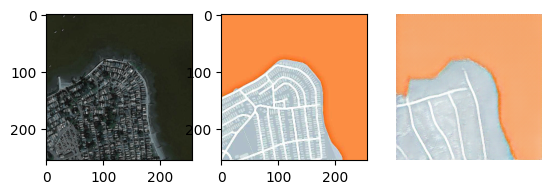

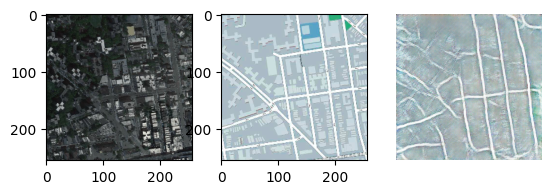

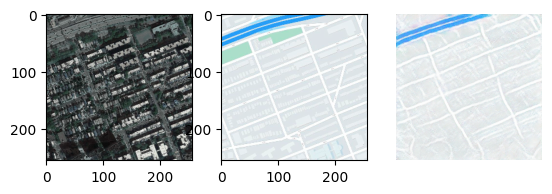

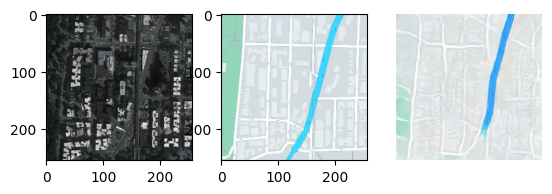

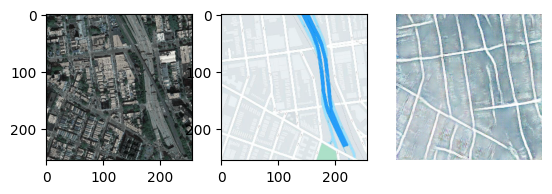

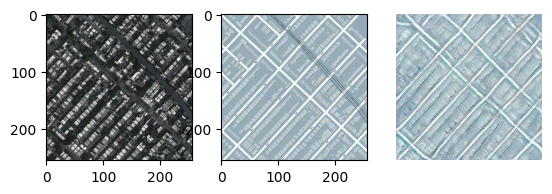

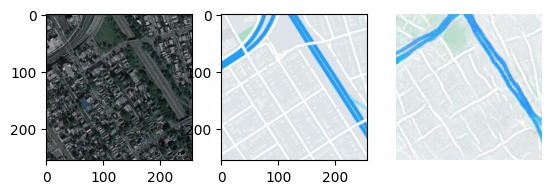

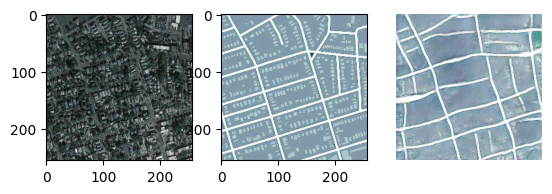

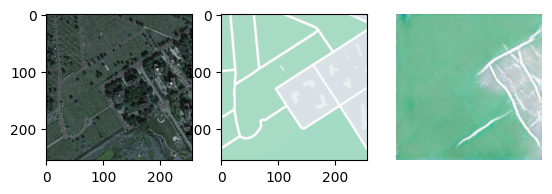

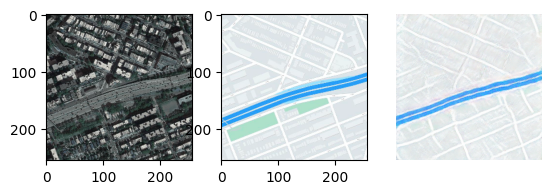

In [21]:
original_sat=resized_sat_map[0:10]
aerial_map=resized_normal_map[0:10]
img=generator(original_sat,training=False)
fig=plt.figure(figsize=(20,20))
for i in range(10):
  plt.figure()
  plt.subplot(1,3,1)
  plt.imshow(original_sat[i])
  plt.subplot(1,3,2)
  plt.imshow(aerial_map[i])
  plt.subplot(1,3,3)
  image1 = tf.keras.preprocessing.image.array_to_img(np.array(img[i]))
  plt.imshow(image1)
  plt.axis('off')
  plt.show()


# for i in range(10):
#     plt.subplot(1,10,i+1)
#     image1 = tf.keras.preprocessing.image.array_to_img(np.array(img[i]))
#     plt.imshow(image1)
#     plt.axis('off')
# plt.show()

In [22]:
import pandas as pd
loss_data=pd.read_csv('loss_image_translation.csv')
loss_data.head()

,d_loss,g_loss
0,0.231238,9.792660
1,0.196139,8.172064
2,0.287982,6.403042
3,1.097687,2.953253
4,1.538629,2.982934


In [23]:
d_loss_=loss_data['d_loss']
g_loss_=loss_data['g_loss']
d_loss_=np.array(d_loss_)
g_loss_=np.array(g_loss_)

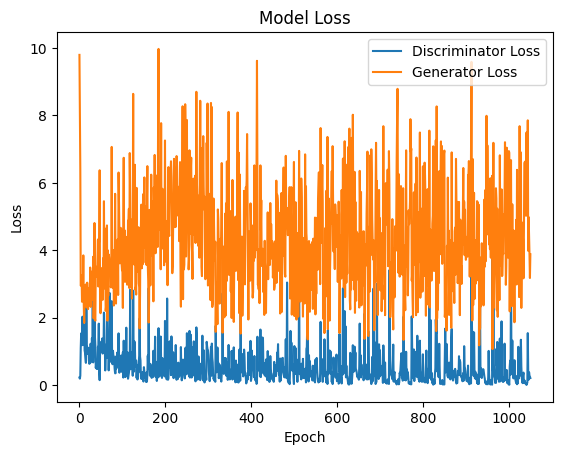

In [24]:
import matplotlib.pyplot as plt

plt.plot(d_loss_)
plt.plot(g_loss_)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.show()

In [25]:
import math

In [30]:
# aerial_pred=generator(resized_sat_map,training=False)
aerial_pred=generator.predict(resized_sat_map,batch_size=128,steps=10)

 9/10 [==========================>...] - ETA: 0s

10/10 [==============================] - 4s 400ms/step


In [31]:
aerial_pred.shape

(1096, 256, 256, 3)

In [32]:
inception_model = tf.keras.applications.InceptionV3(include_top=False,
                              weights="imagenet",
                              pooling='avg')

In [33]:
def compute_embeddings(dataloader, count):
    image_embeddings = []


    # for _ in tqdm(range(count)):
    #     images = next(iter(dataloader))
    embeddings = inception_model.predict(dataloader)


    image_embeddings.extend(embeddings)


    return np.array(image_embeddings)


count = 1096//128
real_image_embeddings = compute_embeddings(resized_normal_map, count)



generated_image_embeddings = compute_embeddings(aerial_pred, count)


real_image_embeddings.shape, generated_image_embeddings.shape


35/35 [==============================] - 7s 212ms/step


((1096, 2048), (1096, 2048))

In [34]:
from scipy import linalg
def calculate_fid(real_embeddings, generated_embeddings):
  # calculate mean and covariance statistics
  mu1, sigma1 = real_embeddings.mean(axis=0), np.cov(real_embeddings, rowvar=False)
  mu2, sigma2 = generated_embeddings.mean(axis=0), np.cov(generated_embeddings,  rowvar=False)
  # calculate sum squared difference between means
  ssdiff = np.sum((mu1 - mu2)**2.0)
  # calculate sqrt of product between cov
  covmean = linalg.sqrtm(sigma1.dot(sigma2))
  # check and correct imaginary numbers from sqrt
  if np.iscomplexobj(covmean):
    covmean = covmean.real
  # calculate score
  fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
  return fid
fid = calculate_fid(real_image_embeddings, generated_image_embeddings)

In [35]:
print('FID Score:',fid)

FID Score: 260.27797901648245
